In [ ]:
import pandas as pd

: 

In [6]:
df=pd.read_csv("Iris.csv")

In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [10]:
data=df.iloc[:,1:]

In [11]:
#version de python
import sys
sys.version

'3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]'

In [12]:
import pycaret
pycaret.__version__

'3.2.0'

In [13]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [20]:
#expérimentation et développement du modèle
from pycaret.classification import ClassificationExperiment
 #instanciation et initialisation
session=ClassificationExperiment()
session.setup(data,target="Species",train_size=0.7,data_split_stratify=True,normalize=True,fold=5,session_id=2023)

print(session)

,Description,Value
0,Session id,2023
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"setosa: 0, versicolor: 1, virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [21]:
#lister les algo dispo pour la classification de la
algos=session.models()
print(algos)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr    

In [22]:
# prenons la regression logistique
modele=session.create_model("lr")
print(modele)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:55:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9048,0.9932,0.9048,0.9048,0.9048,0.8571,0.8571
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
4,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
Mean,0.9524,0.9986,0.9524,0.9560,0.9522,0.9286,0.9305
Std,0.0301,0.0027,0.0301,0.0303,0.0301,0.0452,0.0452


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2023, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [23]:
# evaluation du modèle sur l'echantillon test
res=session.predict_model(modele)
print(res[["Species","prediction_label","prediction_score"]])

        Species prediction_label  prediction_score
131   virginica        virginica            0.9320
44       setosa           setosa            0.9868
55   versicolor       versicolor            0.8332
13       setosa           setosa            0.9849
17       setosa           setosa            0.9791
108   virginica        virginica            0.8709
33       setosa           setosa            0.9960
69   versicolor       versicolor            0.9298
107   virginica        virginica            0.9059
28       setosa           setosa            0.9694
142   virginica        virginica            0.8013
77   versicolor        virginica            0.5445
43       setosa           setosa            0.9708
73   versicolor       versicolor            0.8688
98   versicolor       versicolor            0.8341
86   versicolor       versicolor            0.7377
101   virginica        virginica            0.8013
115   virginica        virginica            0.9478
136   virginica        virginic

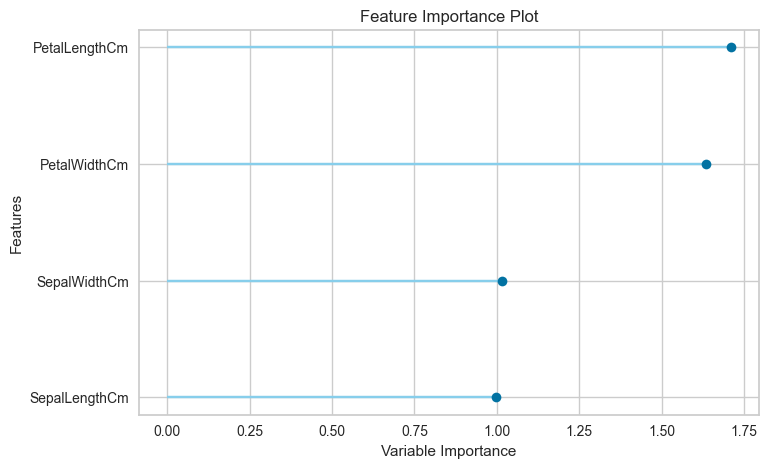

In [24]:
#importance des variables
session.plot_model(modele,plot="feature")

In [25]:
#model définitif entrainé sur la totalité des données
modele_final=session.finalize_model(modele)
#c'est un pipiline en créalité
# avec un preprocessing par défaut
modele_final

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SepalLengthCm', 'SepalWidthCm',
                                             'PetalLengthCm', 'PetalWidthCm'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missi...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=2023,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [26]:
#création du fichier pickle
session.save_model(modele_final,"modele_trained")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SepalLengthCm', 'SepalWidthCm',
                                              'PetalLengthCm', 'PetalWidthCm'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missi...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
                                                                with_me